In [22]:
import pandas as pd

df = pd.read_csv('cleaned_marketPlacesData.csv')

positive_words = [
    'suka', 'puas', 'bagus', 'cepat', 'rekomendasi', 'mantap', 'baik', 'terima', 'kasih', 
    'manfaat', 'senang', 'oke', 'ok', 'good', 'menyenangkan', 'solusi', 'mudah', 'bantu'
]
negative_words = [
    'tidak', 'kecewa', 'buruk', 'lambat', 'masalah', 'jelek', 'lama', 'bohong', 'males', 
    'lemot', 'lot', 'uninstal', 'error', 'susah', 'rugi', 'lelet', 'parah'
]

def assign_sentiment_label(text):
    try:
        word_list = eval(str(text))
        if not isinstance(word_list, list):
            word_list = []
    except:
        word_list = []

    positive_score = sum(1 for word in word_list if word in positive_words)
    negative_score = sum(1 for word in word_list if word in negative_words)

    if positive_score > negative_score:
        return 'Positif'
    elif negative_score > positive_score:
        return 'Negatif'
    else:
        return 'Netral'

df['sentiment_label'] = df['stemmed_content'].apply(assign_sentiment_label)

print("\nProses pelabelan sentimen selesai.")

print("\n--- Hasil Pelabelan ---")
print("Contoh 5 data pertama yang sudah dilabeli:")
print(df[['stemmed_content', 'sentiment_label']].head())

print("\nJumlah ulasan untuk setiap kategori sentimen:")
print(df['sentiment_label'].value_counts())


output_filename = 'labeled_marketPlacesData.csv'
df.to_csv(output_filename, index=False)


Proses pelabelan sentimen selesai.

--- Hasil Pelabelan ---
Contoh 5 data pertama yang sudah dilabeli:
                                     stemmed_content sentiment_label
0  ['sering', 'belanja', 'terus', 'aju', 'tidak',...         Negatif
1   ['semenjak', 'upgrade', 'shopee', 'jadi', 'lot']         Negatif
2          ['selesai', 'masalah', 'sangat', 'buruk']         Negatif
3       ['apk', 'tidak', 'wajah', 'malaikat', 'jls']         Negatif
4  ['lelet', 'stress', 'update', 'baru', 'tetap',...         Negatif

Jumlah ulasan untuk setiap kategori sentimen:
sentiment_label
Netral     3219
Positif    2892
Negatif    2034
Name: count, dtype: int64


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('labeled_marketPlacesData.csv')

X = df['stemmed_content']
y = df['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n--- Hasil Pembagian Data ---")
print(f"Jumlah total data: {len(df)}")
print(f"Jumlah data latih (train): {len(X_train)}")
print(f"Jumlah data uji (test): {len(X_test)}")

train_data = pd.DataFrame({'stemmed_content': X_train, 'sentiment_label': y_train})
test_data = pd.DataFrame({'stemmed_content': X_test, 'sentiment_label': y_test})

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


--- Hasil Pembagian Data ---
Jumlah total data: 8145
Jumlah data latih (train): 6516
Jumlah data uji (test): 1629


In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

X_train = train_df['stemmed_content']
y_train = train_df['sentiment_label']
X_test = test_df['stemmed_content']
y_test = test_df['sentiment_label']

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

print("\n--- Hasil Ekstraksi Fitur TF-IDF ---")
print(f"Dimensi matriks TF-IDF data latih: {X_train_tfidf.shape}")
print(f"Dimensi matriks TF-IDF data uji: {X_test_tfidf.shape}")

print("\nContoh 10 fitur (kata) pertama yang dipelajari dari data:")
print(vectorizer.get_feature_names_out()[:10])


--- Hasil Ekstraksi Fitur TF-IDF ---
Dimensi matriks TF-IDF data latih: (6516, 6155)
Dimensi matriks TF-IDF data uji: (1629, 6155)

Contoh 10 fitur (kata) pertama yang dipelajari dari data:
['aa' 'aaaaa' 'aaaaaaa' 'aaaaaaaaaaaapasiwe' 'aada' 'aah' 'aamiin'
 'aamiinn' 'aang' 'aauuuuuuuubuu']


In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

train_df = pd.read_csv('train_data.csv')

X_train = train_df['stemmed_content'].astype(str)
y_train = train_df['sentiment_label']
X_test = test_df['stemmed_content'].astype(str)
y_test = test_df['sentiment_label']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("Ekstraksi fitur TF-IDF selesai.")

print("\n--- Naive Bayes ---")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

print(f"Akurasi: {accuracy_score(y_test, y_pred_nb):.4f}")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_nb))


print("\n--- Decision Tree ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
y_pred_dt = dt_model.predict(X_test_tfidf)

print(f"Akurasi: {accuracy_score(y_test, y_pred_dt):.4f}")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_dt))

Ekstraksi fitur TF-IDF selesai.

--- Naive Bayes ---
Akurasi: 0.7851
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.72      0.76      0.74       407
      Netral       0.73      0.80      0.76       644
     Positif       0.92      0.79      0.85       578

    accuracy                           0.79      1629
   macro avg       0.79      0.78      0.78      1629
weighted avg       0.79      0.79      0.79      1629


--- Decision Tree ---
Akurasi: 0.9429
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.92      0.93      0.92       407
      Netral       0.94      0.94      0.94       644
     Positif       0.96      0.96      0.96       578

    accuracy                           0.94      1629
   macro avg       0.94      0.94      0.94      1629
weighted avg       0.94      0.94      0.94      1629



Model selesai dilatih dan prediksi telah dibuat.

Visualisasi confusion matrix telah disimpan sebagai 'confusion_matrices.png'


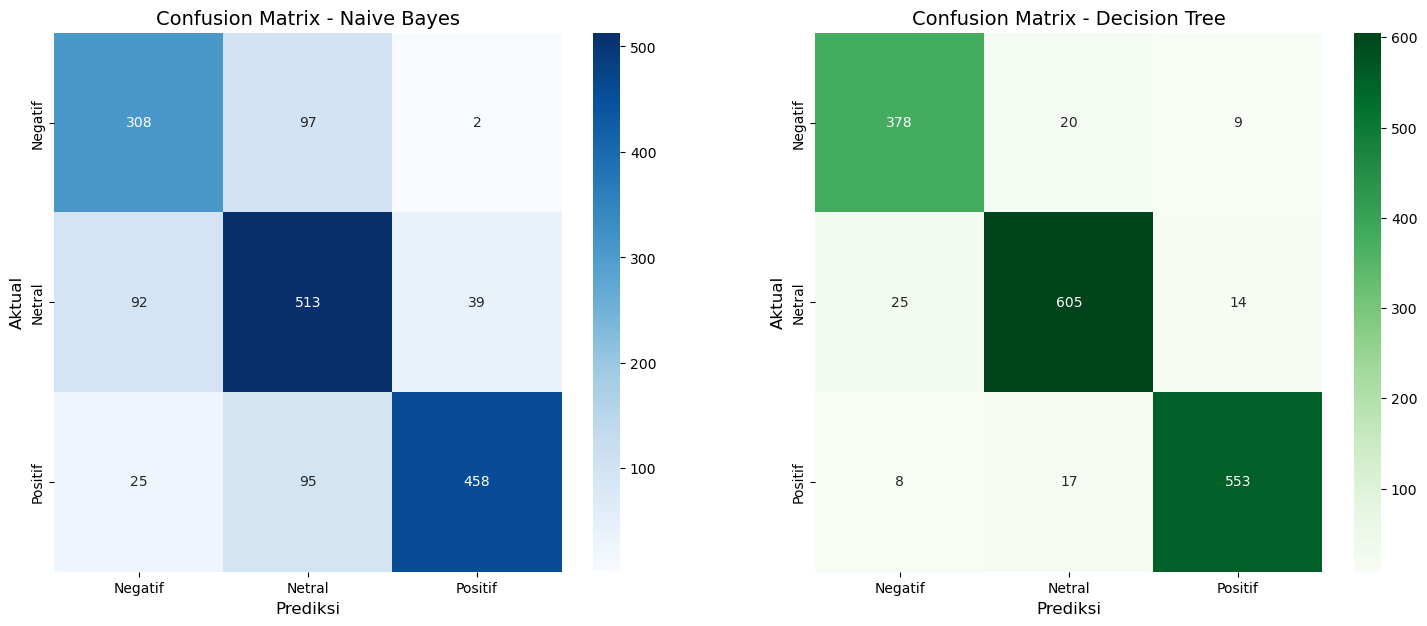

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


train_df = pd.read_csv('train_data.csv')

X_train = train_df['stemmed_content'].astype(str)
y_train = train_df['sentiment_label']
X_test = test_df['stemmed_content'].astype(str)
y_test = test_df['sentiment_label']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
y_pred_dt = dt_model.predict(X_test_tfidf)
print("Model selesai dilatih dan prediksi telah dibuat.")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
labels = sorted(y_test.unique())

# Plot untuk Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=labels)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix - Naive Bayes', fontsize=14)
axes[0].set_xlabel('Prediksi', fontsize=12)
axes[0].set_ylabel('Aktual', fontsize=12)

# Plot untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=labels)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Confusion Matrix - Decision Tree', fontsize=14)
axes[1].set_xlabel('Prediksi', fontsize=12)
axes[1].set_ylabel('Aktual', fontsize=12)

output_filename = 'confusion_matrices.png'
plt.savefig(output_filename)

print(f"\nVisualisasi confusion matrix telah disimpan sebagai '{output_filename}'")

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

train_df = pd.read_csv('train_data.csv')

X_train = train_df['stemmed_content'].astype(str)
y_train = train_df['sentiment_label']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
print("Ekstraksi fitur TF-IDF selesai.\n")


# --- TUNING UNTUK NAIVE BAYES ---
print("--- [Mulai] Tuning Hyperparameter untuk Naive Bayes ---")
param_grid_nb = {'alpha': [0.1, 0.5, 1.0, 2.0]}
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, n_jobs=-1, verbose=1)
grid_search_nb.fit(X_train_tfidf, y_train)

print("\n--- Hasil Tuning Naive Bayes ---")
print(f"Parameter Terbaik: {grid_search_nb.best_params_}")
print(f"Skor Cross-Validation Terbaik: {grid_search_nb.best_score_:.4f}\n")


# --- TUNING UNTUK DECISION TREE ---
print("--- Tuning Hyperparameter untuk Decision Tree ---")
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5, 10]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train_tfidf, y_train)

print("\n--- [Selesai] Hasil Tuning Decision Tree ---")
print(f"Parameter Terbaik: {grid_search_dt.best_params_}")
print(f"Skor Cross-Validation Terbaik: {grid_search_dt.best_score_:.4f}")

Ekstraksi fitur TF-IDF selesai.

--- [Mulai] Tuning Hyperparameter untuk Naive Bayes ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits

--- Hasil Tuning Naive Bayes ---
Parameter Terbaik: {'alpha': 2.0}
Skor Cross-Validation Terbaik: 0.8126

--- Tuning Hyperparameter untuk Decision Tree ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits

--- [Selesai] Hasil Tuning Decision Tree ---
Parameter Terbaik: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Skor Cross-Validation Terbaik: 0.9490


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


best_params_nb = {'alpha': 2.0}
best_params_dt = {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}

train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')


X_train = train_df['stemmed_content'].astype(str)
y_train = train_df['sentiment_label']
X_test = test_df['stemmed_content'].astype(str)
y_test = test_df['sentiment_label']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model Final Naive Bayes
final_nb_model = MultinomialNB(**best_params_nb)
final_nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = final_nb_model.predict(X_test_tfidf)

print("\nLaporan Klasifikasi Final: Naive Bayes (Tuned)")
print(classification_report(y_test, y_pred_nb))

# Model Final Decision Tree
final_dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42)
final_dt_model.fit(X_train_tfidf, y_train)
y_pred_dt = final_dt_model.predict(X_test_tfidf)

print("\nLaporan Klasifikasi Final: Decision Tree (Tuned)")
print(classification_report(y_test, y_pred_dt))


Laporan Klasifikasi Final: Naive Bayes (Tuned)
              precision    recall  f1-score   support

     Negatif       0.76      0.74      0.75       407
      Netral       0.72      0.83      0.77       644
     Positif       0.93      0.79      0.86       578

    accuracy                           0.79      1629
   macro avg       0.80      0.79      0.79      1629
weighted avg       0.80      0.79      0.80      1629


Laporan Klasifikasi Final: Decision Tree (Tuned)
              precision    recall  f1-score   support

     Negatif       0.93      0.93      0.93       407
      Netral       0.94      0.95      0.94       644
     Positif       0.96      0.96      0.96       578

    accuracy                           0.95      1629
   macro avg       0.94      0.94      0.94      1629
weighted avg       0.95      0.95      0.95      1629



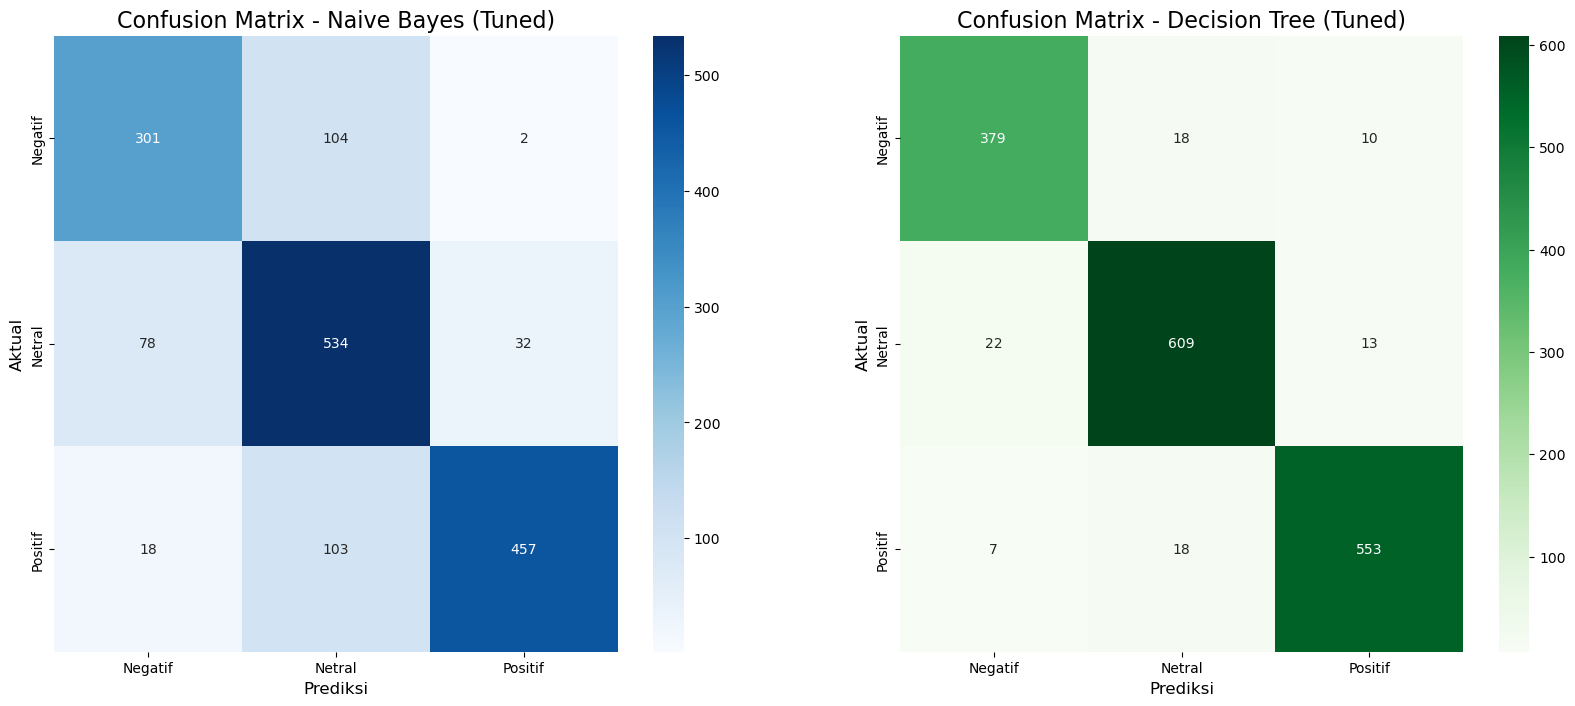

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_params_nb = {'alpha': 2.0}
best_params_dt = {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}

train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

X_train = train_df['stemmed_content'].astype(str)
y_train = train_df['sentiment_label']
X_test = test_df['stemmed_content'].astype(str)
y_test = test_df['sentiment_label']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

final_nb_model = MultinomialNB(**best_params_nb).fit(X_train_tfidf, y_train)
y_pred_nb = final_nb_model.predict(X_test_tfidf)

final_dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42).fit(X_train_tfidf, y_train)
y_pred_dt = final_dt_model.predict(X_test_tfidf)


fig, axes = plt.subplots(1, 2, figsize=(20, 8))
labels = sorted(y_test.unique())

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=labels)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix - Naive Bayes (Tuned)', fontsize=16)
axes[0].set_xlabel('Prediksi', fontsize=12)
axes[0].set_ylabel('Aktual', fontsize=12)

cm_dt = confusion_matrix(y_test, y_pred_dt, labels=labels)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Confusion Matrix - Decision Tree (Tuned)', fontsize=16)
axes[1].set_xlabel('Prediksi', fontsize=12)
axes[1].set_ylabel('Aktual', fontsize=12)

output_filename = 'final_tuned_confusion_matrices.png'
plt.savefig(output_filename)
plt.show()